<h3> Step 1: Import necessary libraries


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('..')

<h3> Step 2: Load data

In [2]:
df = pd.read_csv("../data/loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<h3>Step 3: Explore

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# Shape and data types
print("Raw Data Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# Missing values
print("\nMissing Values:\n", df.isnull().sum())

# Class distribution
print("\nLoan Status Distribution (Raw):\n", df['Loan_Status'].value_counts())


Raw Data Shape: (614, 13)

Data Types:
 Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Missing Values:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Loan Status Distribution (Raw):
 Loan_Status
Y    422
N    192
Name: count, dtype: int64


<h3>Step 4: Visualizations

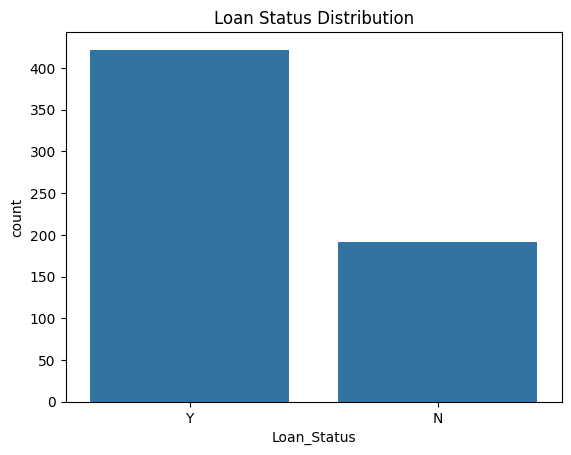

In [6]:
sns.countplot(data=df, x='Loan_Status')
plt.title("Loan Status Distribution")
plt.show()


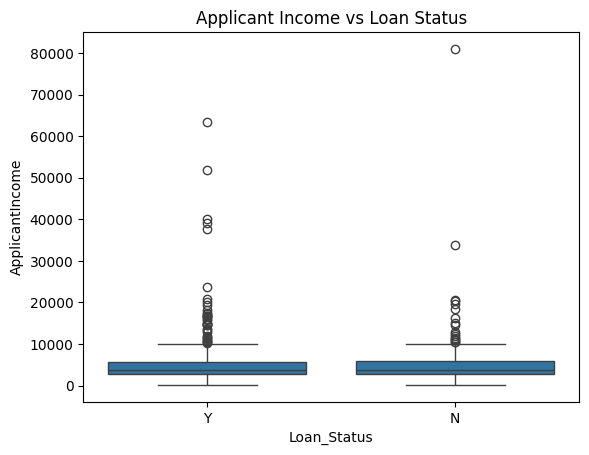

In [7]:
sns.boxplot(data=df, x='Loan_Status', y='ApplicantIncome')
plt.title("Applicant Income vs Loan Status")
plt.show()

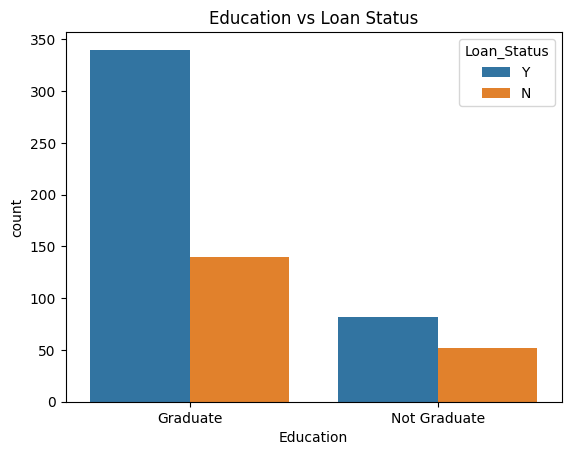

In [8]:
sns.countplot(data=df, x='Education', hue='Loan_Status')
plt.title("Education vs Loan Status")
plt.show()

<h3>Step 5: Correlation heatmap

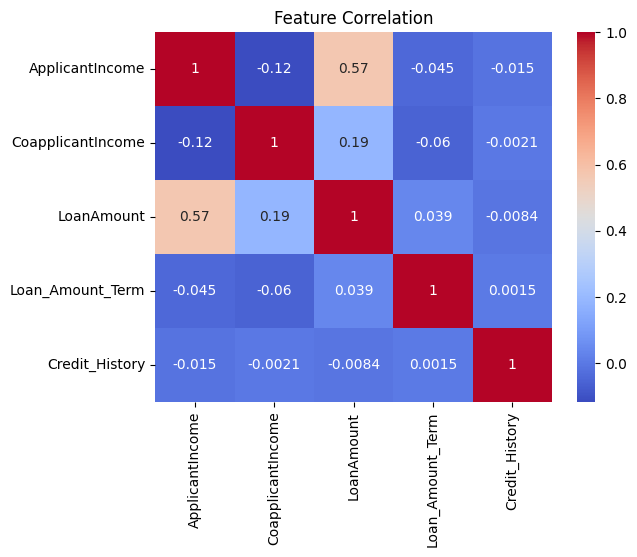

In [9]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

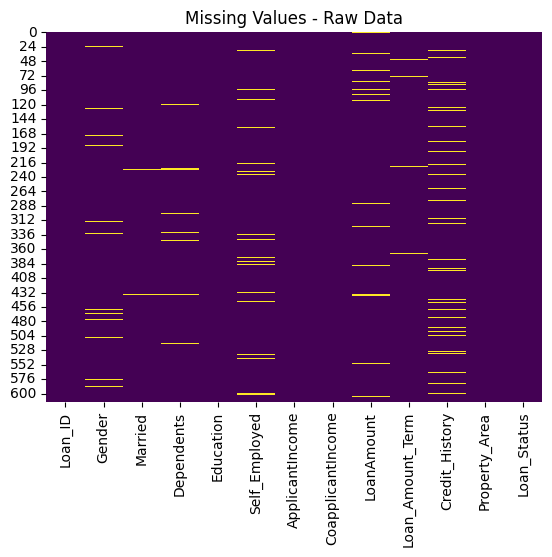

In [12]:
# Missing value heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values - Raw Data")
plt.show()

# After Cleaning and Pre-Processing

In [18]:
from src.data_preprocessing import load_and_clean_data

X_train, X_test, y_train, y_test = load_and_clean_data(path="../data/loan.csv")
cleaned_df = pd.concat([X_train, y_train], axis=1)
cleaned_df.head()


f:\10_study\loan_approval_predictor\notebooks\..\src\data_preprocessing.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
f:\10_study\loan_approval_predictor\notebooks\..\src\data_preprocessing.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
83,1,1,0,0,0,6000,2250.0,265.0,360.0,1.0,1,0
90,1,1,0,0,0,2958,2900.0,131.0,360.0,1.0,1,1
227,1,1,2,0,0,6250,1695.0,210.0,360.0,1.0,1,1
482,1,1,0,0,0,2083,3150.0,128.0,360.0,1.0,1,1
464,1,0,0,0,0,4166,0.0,98.0,360.0,0.0,1,0


<h3>Post Cleaning

In [19]:
print("Cleaned Data Shape:", cleaned_df.shape)
print("\nMissing Values (after cleaning):\n", cleaned_df.isnull().sum())
print("\nLoan Status Distribution (Cleaned):\n", y_train.value_counts())


Cleaned Data Shape: (491, 12)

Missing Values (after cleaning):
 Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Loan Status Distribution (Cleaned):
 Loan_Status
1    342
0    149
Name: count, dtype: int64


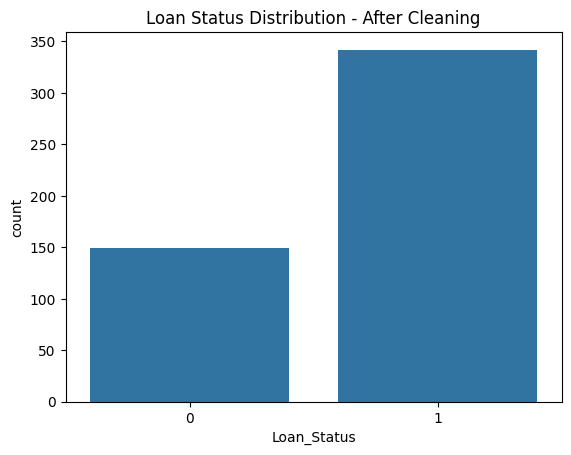

In [20]:
# Loan Status count - Cleaned
sns.countplot(x=y_train)
plt.title("Loan Status Distribution - After Cleaning")
plt.show()
